#### Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_parquet('../data/place2017.parquet')
print(df)

                                   ts                 user_hash  x_coordinate  \
0         2017-04-27 22:15:40.025 UTC  aib1BubZbdy0OulI0vBm4A==           NaN   
1         2017-04-27 22:14:45.713 UTC  aib1BubZbdy0OulI0vBm4A==           NaN   
2         2017-04-03 04:31:56.474 UTC  xUiQPSEcihMTMzWlztL4Mw==         139.0   
3         2017-04-03 15:26:24.002 UTC  ZgQ7jYdcbcCBwhAGW3z3kA==         496.0   
4         2017-04-03 07:04:20.572 UTC  aUwTots+Kb36VauM28FizA==         175.0   
...                               ...                       ...           ...   
16567562  2017-04-01 19:46:30.016 UTC  vDPqqKixKB1UPB0bCs6zXg==          33.0   
16567563  2017-04-01 22:14:12.734 UTC  sosklGzZH4V6ZvoIC9Hp2w==         661.0   
16567564  2017-04-01 03:58:11.645 UTC  NBBDUheuBO3w0Ro8Ya9BrQ==          37.0   
16567565  2017-04-01 09:11:21.455 UTC  PqSxYJLA649CQLpeHMnKXQ==         938.0   
16567566  2017-04-01 03:49:13.406 UTC  Le4MLIr0tztYr+F0uRTI8A==          13.0   

          y_coordinate  col

####  Group users

In [3]:
# Get list of timestamps for each user
user_time = df.drop(['x_coordinate', 'y_coordinate', 'color'], axis=1)
user_time = user_time.groupby(['user_hash'])['ts'].apply(np.array)
user_time = user_time.to_frame(name="ts")
print(user_time)

                                                                         ts
user_hash                                                                  
+++1Vlz/HynORyNN6KYW3A==  [2017-04-03 00:28:21.311 UTC, 2017-04-03 00:35...
+++65/Gtr3bsfIyGiYZM3Q==  [2017-04-02 23:14:44.327 UTC, 2017-04-02 22:32...
+++BM/n7/vMYhc7MJuClGA==                      [2017-04-03 09:52:00.083 UTC]
+++CLfpHJ1E6dJxNoVaAiQ==  [2017-03-31 22:10:07.152 UTC, 2017-04-01 03:51...
+++HgAkMMJuZLTCjfEYjhg==  [2017-04-03 09:25:52.062 UTC, 2017-04-03 10:50...
...                                                                     ...
zzyZf4MB/9V4iAjuju3NRA==                      [2017-04-01 22:35:38.201 UTC]
zzyf4Z97aYdH/MVMxiDsVg==  [2017-04-03 10:17:14.125 UTC, 2017-04-03 10:12...
zzyp7hBp7QI01EArOmJiWA==  [2017-04-01 13:05:08.022 UTC, 2017-04-03 11:23...
zzzIJOLsQ2VV4ugj8BJ5qQ==                      [2017-04-01 17:50:57.146 UTC]
zzzUNPBEy7uWqa44Wgy19w==                      [2017-04-03 07:26:51.889 UTC]

[1166940 ro

#### Create histogram for pixels placed by users

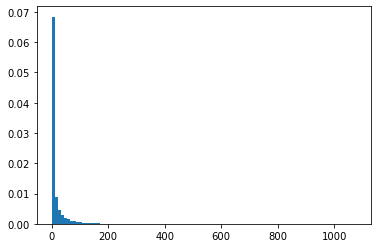

In [4]:
# Add counter to each user
user_time['count'] = user_time['ts'].apply(lambda x: len(x))

plt.hist(user_time['count'], bins=100, density=True)
plt.savefig('place2017_hist.png')

#### Identify users who place the most pixels

In [5]:
# Find users in the top 10%
user_time_sorted = user_time.sort_values(by='count', ascending=False)
user_time_sorted = user_time_sorted.reset_index()
user_time_sorted = user_time_sorted.head(int(user_time_sorted.shape[0]*0.1))
print(user_time_sorted)

                       user_hash  \
0       cshukVZuX0+xz8G+g2a/Mg==   
1       zu9pk6gf6AFSAF5rbSbSVQ==   
2       Bh89QQQr3o921DeyLlw2qQ==   
3       TdZvo39XfSJxmD3os02voA==   
4       fx8ccjRf1Nz++DZX6fvkOQ==   
...                          ...   
116689  fLP7EeF4VZjWG4n/LG7y0w==   
116690  JBs4MIwgUj6PgxFaq2PCcQ==   
116691  yf+4SMWLcFsuRRoIk3HSRw==   
116692  qd34+cbBq/qUqQSLXPnhww==   
116693  JBifck2MS/qV3YLM/ix6Aw==   

                                                       ts  count  
0       [2017-03-25 04:27:03.222 UTC, 2017-03-31 18:00...   1077  
1       [2017-04-02 17:00:06.344 UTC, 2017-04-03 10:39...    656  
2       [2017-03-24 21:59:41.791 UTC, 2017-03-24 21:57...    617  
3       [2017-03-31 19:08:22.312 UTC, 2017-04-02 01:43...    611  
4       [2017-04-02 17:22:27.921 UTC, 2017-04-02 18:51...    600  
...                                                   ...    ...  
116689  [2017-04-02 19:08:05.968 UTC, 2017-04-02 20:46...     39  
116690  [2017-04-03 05:22:25.31

#### Look at top user timestamps

In [37]:
import datetime

top_user_ts = user_time_sorted['ts'].iloc[0]
top_user_ts.sort()
print(top_user_ts)

def str_to_dt(dt):
    dt = datetime.datetime.strptime(dt.replace(" UTC", "+0000"), '%Y-%m-%d %H:%M:%S.%f%z')
    return dt

top1 = np.array([str_to_dt(x) for x in top_user_ts[1:]])
top2 = np.array([str_to_dt(x) for x in top_user_ts[:-1]])
diff = top1 - top2
diff = [x.total_seconds() for x in diff]
print(diff)

['2017-03-24 20:24:30.008 UTC' '2017-03-24 20:24:47.098 UTC'
 '2017-03-24 20:25:01.918 UTC' ... '2017-04-03 16:36:36.24 UTC'
 '2017-04-03 16:42:42.282 UTC' '2017-04-03 16:49:47.587 UTC']
[17.09, 14.82, 17.85, 15.574, 13.689, 12.291, 11.969, 12.601, 14.905, 14.09, 15.136, 13.0, 14.628, 12.692, 13.947, 204.241, 942.817, 12.671, 14.889, 36.304, 20.434, 13.347, 13.322, 12.415, 14.491, 12.686, 12.913, 12.822, 26.542, 13.945, 12.388, 11.392, 13.365, 11.708, 13.02, 12.193, 12.442, 11.978, 19.79, 18.832, 13.149, 11.769, 12.597, 14.135, 15.898, 24.405, 14.473, 12.106, 12.139, 11.792, 12.611, 13.024, 12.676, 341.476, 12.792, 11.453, 25.761, 14.103, 22.728, 16.491, 12.657, 26.522, 12.713, 12.051, 26.594, 13.414, 12.686, 12.334, 11.901, 53.454, 16.665, 14.456, 16.179, 104.837, 13.717, 12.659, 12.038, 11.674, 18.992, 20.887, 12.576, 12.774, 13.354, 17.011, 22.98, 21.809, 12.723, 33.954, 13.637, 11.89, 12.19, 12.003, 15.018, 12.994, 13.302, 46.049, 12.921, 12.905, 12.274, 20.894, 35.011, 19.629, 12.